# Fake -News Detection Project 

In [1]:
#importing the necessary libraries

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train_news.csv') #imported the dataset

In [4]:
df.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
df.shape  #checking the shape of the dataset

(20800, 6)

In [6]:
df.dropna(inplace=True)  #dropping the null values

In [7]:
df.shape

(18285, 6)

In [8]:
#using iloc i have selected the particular columns

In [9]:
df=df.iloc[:,2:6]

In [10]:
df.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [11]:
#so finally i have fetched my required columns

In [12]:
print('fake and reliable counts - >',df['label'].value_counts())

fake and reliable counts - > 0    10361
1     7924
Name: label, dtype: int64


In [13]:
(df['label']==1).value_counts()

False    10361
True      7924
Name: label, dtype: int64

In [14]:
(df['label']==0).value_counts()

True     10361
False     7924
Name: label, dtype: int64

In [15]:
#the dataset is balanced

In [16]:
y=df['label']

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [18]:
#importing the libraries
import seaborn as sns
from matplotlib import pyplot as plt

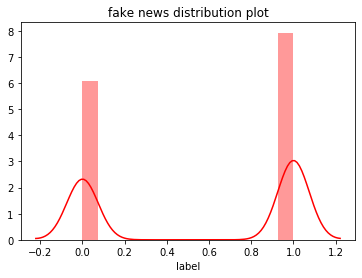

In [19]:
sns.distplot(df['label']==0,color='red')
plt.title('fake news distribution plot')
plt.show()
plt.figsize=(16,8)

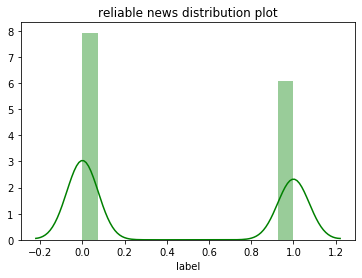

In [20]:
sns.distplot(df['label']==1,color='green')
plt.title('reliable news distribution plot')
plt.show()
plt.figsize=(16,8)

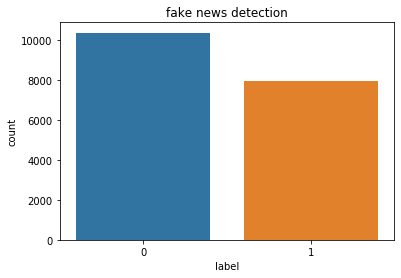

In [21]:
sns.countplot(df['label'])
plt.title('fake news detection')
plt.show()

In [29]:
#now we will plot the word cloud for news and headline

In [22]:
from wordcloud import WordCloud

In [23]:
fake=df['headline'][df['label']==0]

In [24]:
fake1=df['news'][df['label']==0]

In [25]:
fake_cloud=WordCloud(width=800,height=600,background_color='white',max_words=50).generate(' '.join(fake))

In [26]:
fake1_cloud=WordCloud(width=800,height=600,background_color='white',max_words=50).generate(' '.join(fake1))

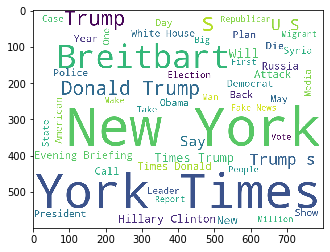

In [27]:
fake_cloud
plt.imshow(fake_cloud)

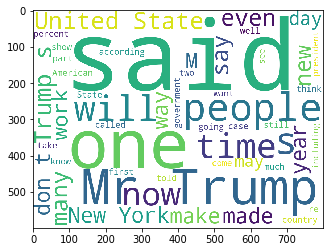

In [28]:
fake1_cloud
plt.imshow(fake1_cloud)

In [25]:
messages=df.copy()  #creating a copy of actual data

In [26]:
messages.head()

,headline,written_by,news,label
0,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [27]:
messages.reset_index(inplace=True)

In [28]:
messages['headline'][6]

'Alabama Prison Officials Retaliate Against Prison Strike Leader By Cutting Water To Cell'

In [96]:
#now we will do some preprocessing by removing the stopwords and we have used porter stemmer for stemming purpose

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
  
    review = re.sub("[^a-z]"," ",str(messages['headline'][i]))
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
corpus[3]

'aul e age esieg ain overnor end onflict ignal ver ntention ew ork ime'

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [98]:
# i have converted the data into vectors so that it can be given to the model

In [32]:
X.shape

(18285, 5000)

In [33]:
y=messages['label']

In [34]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [35]:
cv.get_feature_names()[:20]

['ab',
 'abbi',
 'abel',
 'abi',
 'abinet',
 'abinet ick',
 'abit',
 'abl',
 'abor',
 'abotag',
 'abour',
 'abul',
 'ac',
 'acat',
 'acat ew',
 'acat ew ork',
 'accin',
 'ace',
 'ace ew',
 'ace ew ork']

In [36]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [87]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df

,ab,abbi,abel,abi,abinet,abinet ick,abit,abl,abor,abotag,...,yrian ar,yrian ar eport,yrian ebel,yrian efuge,yru,ystem,ysteri,ysteriou,yth,zu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#removing outliers from the dataset

In [38]:
from scipy.stats import zscore
import numpy as np

In [39]:
z=(np.abs(zscore(X)))

In [40]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 18284, 18284, 18284], dtype=int64), array([1298, 3031, 3179, ..., 2798, 2859, 4519], dtype=int64))


In [41]:
X_new=X[(z<3).all(axis=1)]

In [42]:
print('shape of the data after removing outliers:',X_new.shape)
print('original shape is:',X.shape)

shape of the data after removing outliers: (260, 5000)
original shape is: (18285, 5000)


In [43]:
#testing the preprocessed data on different ML models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
max_acc_score=0
for i in range(42,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,test_size=0.33)
    lg=LogisticRegression()
    lg.fit(X_train,y_train)
    pred=lg.predict(X_test)
    acc_score=accuracy_score(y_test,pred)
    print("the maX accuracy score corrosponding to the random state",i,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=i
print()
print()

print("the maX accuracy score for the final random state",final_r_state,"is:",max_acc_score)

the maX accuracy score corrosponding to the random state 42 is: 0.9350455675227838
the maX accuracy score corrosponding to the random state 43 is: 0.9343827671913836
the maX accuracy score corrosponding to the random state 44 is: 0.9309030654515327
the maX accuracy score corrosponding to the random state 45 is: 0.9332228666114333
the maX accuracy score corrosponding to the random state 46 is: 0.9335542667771334
the maX accuracy score corrosponding to the random state 47 is: 0.9337199668599834
the maX accuracy score corrosponding to the random state 48 is: 0.9355426677713339
the maX accuracy score corrosponding to the random state 49 is: 0.9330571665285833
the maX accuracy score corrosponding to the random state 50 is: 0.927920463960232
the maX accuracy score corrosponding to the random state 51 is: 0.9332228666114333
the maX accuracy score corrosponding to the random state 52 is: 0.935874067937034
the maX accuracy score corrosponding to the random state 53 is: 0.9368682684341342
the ma

In [48]:
#so from the above implementation we can see that logistic regression is giving 94% accuracy score at a random state of 55.

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      3429
           1       0.88      0.97      0.92      2606

    accuracy                           0.93      6035
   macro avg       0.93      0.93      0.93      6035
weighted avg       0.93      0.93      0.93      6035



In [50]:
confusion_matrix(y_test,pred)

array([[3093,  336],
       [  87, 2519]], dtype=int64)

In [51]:
#now we will test the results with few more models

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=55,test_size=0.20)

In [53]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [54]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [55]:
pred1=mnb.predict(X_test)

In [56]:
print('accuracy score for MNB is:',accuracy_score(y_test,pred1))

accuracy score for MNB is: 0.8988241728192508


In [ ]:
#hyper parameter tuning with MultinomialNB

In [91]:
previous_score=0
l1=[0,1,0.1]
for alpha in l1:
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print(alpha,'->', score)

0 -> 0.8888152444076222
1 -> 0.9000828500414251
0.1 -> 0.9010770505385253


In [72]:
#conclusion:-So from the above we can say that Multinomial naive bayes classifier is giving 89% accuracy score

In [73]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2038
           1       0.89      0.88      0.89      1619

    accuracy                           0.90      3657
   macro avg       0.90      0.90      0.90      3657
weighted avg       0.90      0.90      0.90      3657



In [80]:
from sklearn.metrics import log_loss
print( "log_loss",log_loss(y_test, pred1))

log_loss 3.494527535047099


In [ ]:
#the log loss for mnb is 3.5

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc=DecisionTreeClassifier()

In [71]:
a=['gini','entropy']
for i in a:
    dtc=DecisionTreeClassifier(criterion=i)
    dtc.fit(X_train,y_train)
    preddtc=dtc.predict(X_test)
    print("accuracy score with criterion as",i,"is:",accuracy_score(y_test,preddtc))

accuracy score with criterion as gini is: 0.9135903746240087
accuracy score with criterion as entropy is: 0.9146841673502871


In [75]:
print(classification_report(y_test,preddtc))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2038
           1       0.89      0.92      0.91      1619

    accuracy                           0.91      3657
   macro avg       0.91      0.92      0.91      3657
weighted avg       0.92      0.91      0.91      3657



In [77]:
print( "log_loss",log_loss(y_test, preddtc))

log_loss 2.946746010042076


In [81]:
#the log loss for the decision tree classifier is 3

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=55,test_size=0.33)

In [83]:
lg=LogisticRegression()
lg.fit(X_train,y_train)
pred=lg.predict(X_test)
acc_score=accuracy_score(y_test,pred)

In [84]:
print('accuracy score is:',accuracy_score(y_test,pred))

accuracy score is: 0.9408450704225352


In [106]:
#plotting auc=roc curve

In [99]:
from sklearn.metrics import roc_auc_score,roc_curve

In [102]:
y_pred_prob=lg.predict_proba(X_test)[:,1]

In [103]:
y_pred_prob

array([1.00185401e-03, 1.41056295e-03, 5.09551570e-04, ...,
       1.24114814e-04, 9.69563734e-01, 8.02795794e-01])

In [104]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

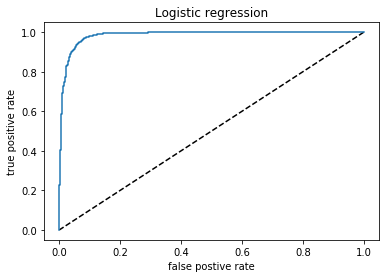

In [105]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('false postive rate')
plt.ylabel("true positive rate")
plt.title("Logistic regression")
plt.show()